In [1]:
%matplotlib inline
import cartopy
import pandas as pd
import matplotlib.pyplot as plt
import geopandas 
import ipyleaflet
import numpy as np
import bqplot

## Motivation: plots in bqplot

In [3]:
# data -- nothing yet!

# scales
sc_geo = bqplot.Mercator() # not a great projection!

# axis
shape_data = bqplot.topo_load('map_data/WorldMap.json')

# marks
shape_map = bqplot.Map(map_data=shape_data, scales={'projection':sc_geo})

# put it all together in a figure
fig = bqplot.Figure(marks=[shape_map], 
                   fig_margin={'top':0, 'bottom':0, 'left':0, 'right':0})
fig

Figure(fig_margin={'top': 0, 'bottom': 0, 'left': 0, 'right': 0}, marks=[Map(hovered_styles={'hovered_fill': '…

In [4]:
# data -- nothing yet!

# scales
sc_geo = bqplot.Gnomonic() # a nightmare!

# axis
shape_data = bqplot.topo_load('map_data/WorldMap.json')

# marks
shape_map = bqplot.Map(map_data=shape_data, scales={'projection':sc_geo})

# put it all together in a figure
fig = bqplot.Figure(marks=[shape_map], 
                   fig_margin={'top':0, 'bottom':0, 'left':0, 'right':0})
fig

Figure(fig_margin={'top': 0, 'bottom': 0, 'left': 0, 'right': 0}, marks=[Map(hovered_styles={'hovered_fill': '…

In [5]:
# data -- nothing yet!

# scales
sc_geo = bqplot.AlbersUSA() # this is ok

# axis
shape_data = bqplot.topo_load('map_data/USStatesMap.json')

# marks
shape_map = bqplot.Map(map_data=shape_data, scales={'projection':sc_geo})

# put it all together in a figure
fig = bqplot.Figure(marks=[shape_map], 
                   fig_margin={'top':0, 'bottom':0, 'left':0, 'right':0})
fig

Figure(fig_margin={'top': 0, 'bottom': 0, 'left': 0, 'right': 0}, marks=[Map(hovered_styles={'hovered_fill': '…

In [6]:
# you don't have to run this line, just take a look:
!ls ~/opt/anaconda3/pkgs/bqplot-0.12.2-py_0/site-packages/bqplot/map_data

EuropeMap.json     USCountiesMap.json USStatesMap.json   WorldMap.json


## Using geopandas for geometric data

In [7]:
geopandas.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

In [8]:
gdf = geopandas.read_file(geopandas.datasets.get_path('nybb'))

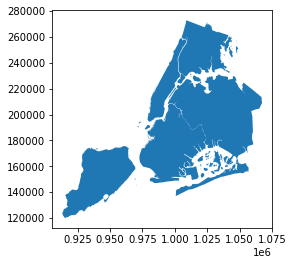

In [9]:
gdf.plot()

In [10]:
gdf.head()

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


We went to the Champaign city GIS page and looked for council districts.

In [11]:
gdf_councils = geopandas.read_file('https://opendata.arcgis.com/datasets/1f75636917604299861fb408bbf79378_1.geojson')

In [12]:
gdf_councils.head()

,OBJECTID_1,District,Council_me,ShapeSTArea,ShapeSTLength,geometry
0,811,5,Vanna Pianfetti,1.827758e+08,209845.933925,"POLYGON ((-88.31441 40.11699, -88.31454 40.116..."
1,812,3,Angie Brix,2.007085e+08,145404.494177,"POLYGON ((-88.27716 40.16364, -88.27732 40.163..."
2,813,1,Clarissa Nickerson Fourman,1.078965e+08,83420.727939,"POLYGON ((-88.22283 40.16000, -88.22283 40.160..."
3,814,4,Greg Stock,1.049800e+08,77363.320814,"POLYGON ((-88.26890 40.12733, -88.27076 40.127..."
4,815,2,Alicia Beck,5.164512e+07,62243.277115,"POLYGON ((-88.23537 40.10798, -88.23537 40.107..."


In [13]:
gdf_councils.describe()

,OBJECTID_1,ShapeSTArea,ShapeSTLength
count,5.000000,5.000000e+00,5.000000
mean,813.000000,1.296012e+08,115655.550794
std,1.581139,6.131525e+07,61471.695860
min,811.000000,5.164512e+07,62243.277115
25%,812.000000,1.049800e+08,77363.320814
50%,813.000000,1.078965e+08,83420.727939
75%,814.000000,1.827758e+08,145404.494177
max,815.000000,2.007085e+08,209845.933925


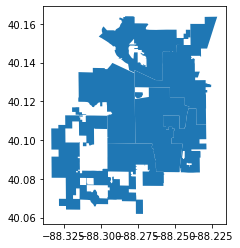

In [14]:
gdf_councils.plot()

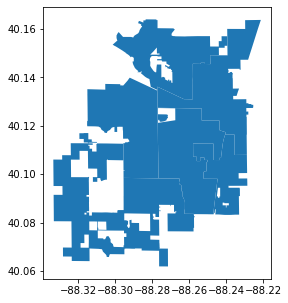

In [15]:
fig, ax = plt.subplots(figsize=(5,5))

gdf_councils.plot(ax=ax)

plt.show()

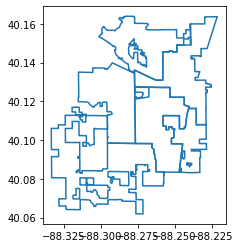

In [16]:
gdf_councils.boundary.plot()

In [17]:
gdf_councils.crs # CRS means Coordinate Reference System

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [18]:
#{'init':'epsg:4326'}
# We aren't going to panic (yet) if we just see the line above

Read in some champaign-city owned properties:

In [19]:
gdf_props = geopandas.read_file('https://opendata.arcgis.com/datasets/3ecbc7baf1a44110a98f6d4420432000_2.geojson')

In [20]:
gdf_props.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

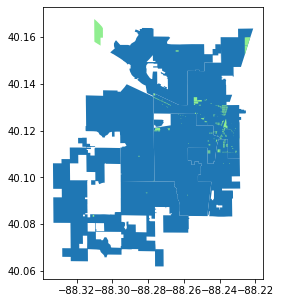

In [21]:
fig, ax = plt.subplots(figsize=(5,5))

gdf_councils.plot(ax=ax) # council districts

gdf_props.plot(ax=ax, color='lightgreen')

plt.show()

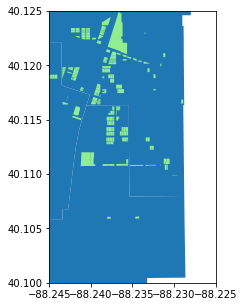

In [24]:
fig, ax = plt.subplots(figsize=(6,5))

gdf_councils.plot(ax=ax) # council districts

gdf_props.plot(ax=ax, color='lightgreen')

# zoom into ~iSchool
ax.set_xlim(-88.245, -88.225)
ax.set_ylim(40.10, 40.125)

plt.show()

## A few other sources of public data

Google things like "GIS -place of interest-" "geojson -place of interest-"

In [25]:
# a bit of a mess (website hard to figure out)
gdf_states = geopandas.read_file('https://www2.census.gov/geo/tiger/TIGER2019/STATE/tl_2019_us_state.zip')
# we gave it a zip!

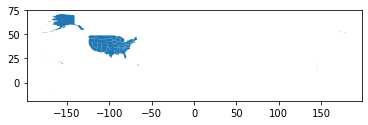

In [26]:
gdf_states.plot()

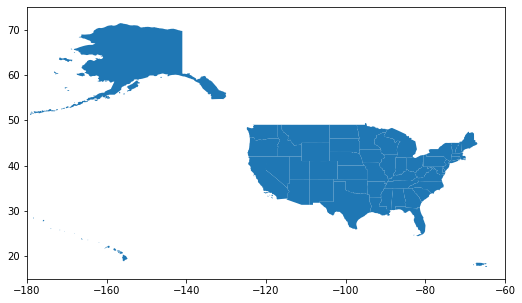

In [27]:
fig, ax = plt.subplots(figsize=(10,5))

gdf_states.plot(ax=ax)

ax.set_xlim(-180,-60)
ax.set_ylim(15,75)

plt.show()

In [32]:
#gdf_na = geopandas.read_file('/Users/jillnaiman/Downloads/tl_2019_us_aiannh/tl_2019_us_aiannh.shp')
# note: a shp file (shapefile) and not a geojsonf file

# use this dataset remotely
# 'https://www2.census.gov/geo/tiger/TIGER2019/STATE/tl_2019_us_state.zip'
gdf_na = geopandas.read_file('https://www2.census.gov/geo/tiger/TIGER2019/AIANNH/tl_2019_us_aiannh.zip')

In [33]:
gdf_na.head()

,AIANNHCE,AIANNHNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,COMPTYP,AIANNHR,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,2320,02419022,2320R,Mohegan,Mohegan Reservation,86,D8,R,F,G2101,A,1767260,0,+41.4900915,-072.0940543,"MULTIPOLYGON (((-72.08912 41.48040, -72.08900 ..."
1,9100,01930930,9100R,Golden Hill Paugussett,Golden Hill Paugussett (state) Reservation,86,D4,R,S,G2101,A,399343,0,+41.5521875,-072.2680204,"MULTIPOLYGON (((-72.26917 41.55472, -72.26774 ..."
2,4110,02419484,4110R,Table Mountain,Table Mountain Rancheria,85,D2,R,F,G2101,A,551202,0,+36.9848914,-119.6359563,"POLYGON ((-119.64092 36.98425, -119.64081 36.9..."
3,1380,01666180,1380R,Greenville,Greenville Rancheria,85,D2,R,F,G2101,A,284692,0,+40.1487839,-120.8933989,"POLYGON ((-120.89737 40.15100, -120.89733 40.1..."
4,1110,00806894,1110R,Flathead,Flathead Reservation,86,D2,R,F,G2101,A,5013467042,316267878,+47.4967703,-114.2842791,"POLYGON ((-114.85121 47.88721, -114.81989 47.8..."


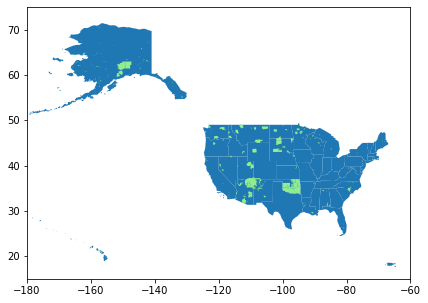

In [34]:
fig, ax = plt.subplots(figsize=(10,5))

gdf_states.plot(ax=ax)
gdf_na.plot(ax=ax, color='lightgreen')

ax.set_xlim(-180,-60)
ax.set_ylim(15,75)

plt.show()

## Geopandas + contextily

In [35]:
gdf = geopandas.read_file(geopandas.datasets.get_path('nybb'))
gdf

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


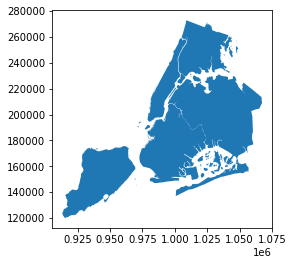

In [36]:
gdf.plot()

In [37]:
gdf.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: USA - New York - SPCS - Long Island
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [38]:
# change into a lat/long representation
gdf_ll = gdf.to_crs(epsg=4326)

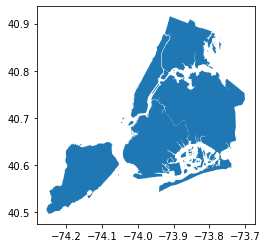

In [39]:
gdf_ll.plot()

In [40]:
import contextily as ctx

In [41]:
# first project our data into Web Mercator (an excuse to change CRS again)
gdf_wm = gdf.to_crs(epsg=3857)

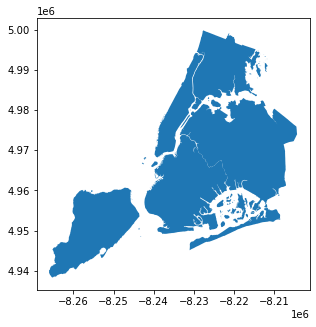

In [42]:
fig, ax = plt.subplots(figsize=(5,5))

gdf_wm.plot(ax=ax)

plt.show()

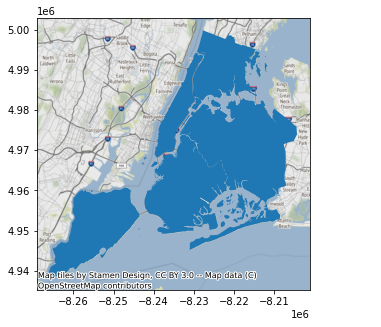

In [43]:
fig, ax = plt.subplots(figsize=(5,5))

gdf_wm.plot(ax=ax)
ctx.add_basemap(ax=ax)

plt.show()

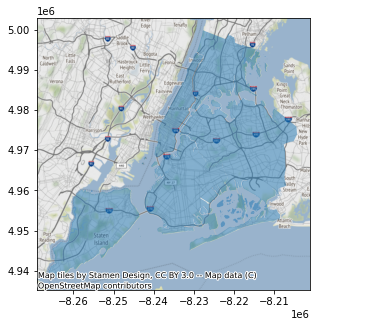

In [44]:
fig, ax = plt.subplots(figsize=(5,5))

gdf_wm.plot(ax=ax, alpha=0.5) # alpha=0.5 for a little seethrough
ctx.add_basemap(ax=ax)

plt.show()

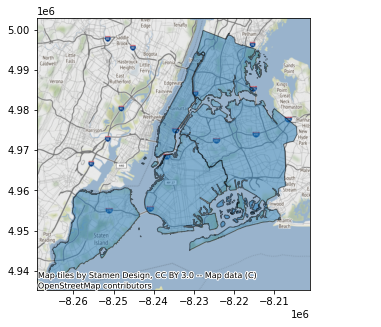

In [45]:
fig, ax = plt.subplots(figsize=(5,5))

gdf_wm.plot(ax=ax, alpha=0.5, edgecolor='black') # alpha=0.5 for a little seethrough, edgecolor for boundaries
ctx.add_basemap(ax=ax)

plt.show()

Now with Champaign GIS data!

In [46]:
gdf_councils = geopandas.read_file('https://opendata.arcgis.com/datasets/1f75636917604299861fb408bbf79378_1.geojson')


In [47]:
gdf_councils

,OBJECTID_1,District,Council_me,ShapeSTArea,ShapeSTLength,geometry
0,811,5,Vanna Pianfetti,1.827758e+08,209845.933925,"POLYGON ((-88.31441 40.11699, -88.31454 40.116..."
1,812,3,Angie Brix,2.007085e+08,145404.494177,"POLYGON ((-88.27716 40.16364, -88.27732 40.163..."
2,813,1,Clarissa Nickerson Fourman,1.078965e+08,83420.727939,"POLYGON ((-88.22283 40.16000, -88.22283 40.160..."
3,814,4,Greg Stock,1.049800e+08,77363.320814,"POLYGON ((-88.26890 40.12733, -88.27076 40.127..."
4,815,2,Alicia Beck,5.164512e+07,62243.277115,"POLYGON ((-88.23537 40.10798, -88.23537 40.107..."


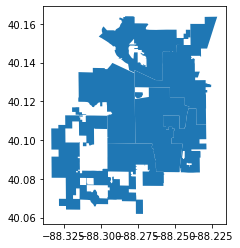

In [48]:
gdf_councils.plot()

In [49]:
gdf_councils.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

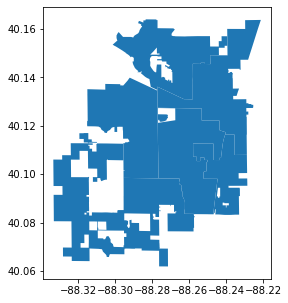

In [50]:
# first plot this map on a figure axis
fig, ax = plt.subplots(figsize=(5,5))

gdf_councils.plot(ax=ax)

plt.show()

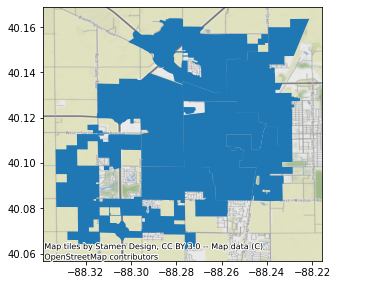

In [51]:
fig, ax = plt.subplots(figsize=(5,5))

gdf_councils.plot(ax=ax)
ctx.add_basemap(ax=ax, crs=gdf_councils.crs.to_string())

plt.show()

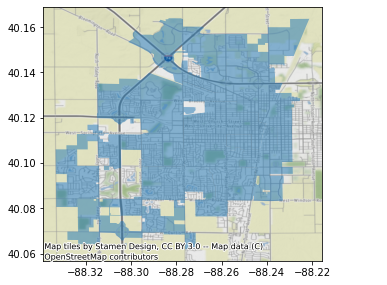

In [52]:
fig, ax = plt.subplots(figsize=(5,5))

gdf_councils.plot(ax=ax, alpha=0.5)
ctx.add_basemap(ax=ax, crs=gdf_councils.crs.to_string())

plt.show()

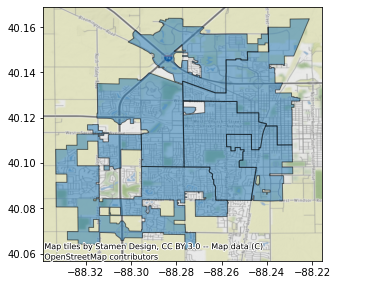

In [53]:
fig, ax = plt.subplots(figsize=(5,5))

gdf_councils.plot(ax=ax, alpha=0.5, edgecolor='black')
ctx.add_basemap(ax=ax, crs=gdf_councils.crs.to_string())

plt.show()

Adding another layer -- the Champaign apartments dataset

In [54]:
gdf_apts = geopandas.read_file('https://opendata.arcgis.com/datasets/64154052c5a040e287bae1583d727825_8.geojson')

In [55]:
gdf_apts.head()

,OBJECTID,Address,Parcel,Units,Stories,UniqueID,Building_Name,Complex_Name,Case_Number,Building_Type,...,Comments,Safety_Comments,Fire_Alarms,Sprinkler,Managing_Company,MFRecyclingStatus,ShapeSTArea,ShapeSTLength,Shape,geometry
0,1,2009 Moreland Blvd,412001126038,36,3,0.0,2009 Moreland Blvd,University Village at Champaign,AI07-0147,Complex,...,,,Yes,Yes,None,Yes,19657.997437,929.167804,None,"POLYGON ((-88.25315 40.14017, -88.25315 40.140..."
1,2,2011 Moreland Blvd,412001126038,36,3,1.0,2011 Moreland Blvd,University Village at Champaign,AI07-0147,Complex,...,,,Yes,Yes,None,Yes,19735.512329,950.194217,None,"POLYGON ((-88.25260 40.14057, -88.25256 40.140..."
2,3,2007 Moreland Blvd,412001126038,24,3,2.0,2007 Moreland Blvd,University Village at Champaign,AI07-0147,Complex,...,,,Yes,Yes,None,Yes,13970.178833,678.398035,None,"POLYGON ((-88.25274 40.14045, -88.25274 40.140..."
3,4,2003 Moreland Blvd,412001126038,36,3,3.0,2003 Moreland Blvd,University Village at Champaign,AI07-0147,Complex,...,,,Yes,Yes,None,Yes,19739.423340,941.358477,None,"POLYGON ((-88.25154 40.13978, -88.25156 40.139..."
4,5,2005 Moreland Blvd,412001126038,24,3,4.0,2005 Moreland Blvd,University Village at Champaign,AI07-0147,Complex,...,,,Yes,Yes,None,Yes,13065.121582,636.744457,None,"POLYGON ((-88.25351 40.13934, -88.25348 40.139..."


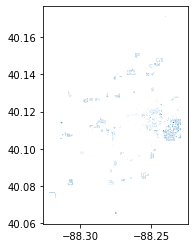

In [56]:
gdf_apts.plot()

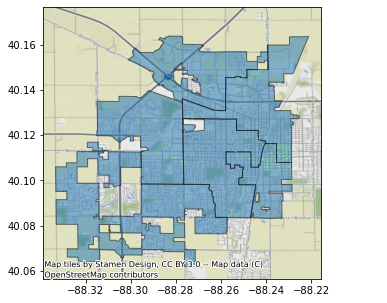

In [57]:
fig, ax = plt.subplots(figsize=(5,5))

gdf_councils.plot(ax=ax, alpha=0.5, edgecolor='black')
gdf_apts.plot(ax=ax, color='lightgreen')
ctx.add_basemap(ax=ax, crs=gdf_councils.crs.to_string())

plt.show()

Let's color our apartments by building type:

In [58]:
gdf_apts['Building_Type'].unique()

array(['Complex', 'Building', 'House', 'Over Commercial', None, 'Other'],
      dtype=object)

In [59]:
None

Tidbit of data cleaning to get rid of the `None` - *mask* out and replace the None in Building_Type

In [60]:
gdf_apts['Building_Type'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
2312     True
2313     True
2314     True
2315    False
2316    False
Name: Building_Type, Length: 2317, dtype: bool

In [61]:
gdf_apts.loc[gdf_apts['Building_Type'].isnull(), 'Building_Type'] = 'Not Specified'

In [62]:
gdf_apts['Building_Type'].unique()

array(['Complex', 'Building', 'House', 'Over Commercial', 'Not Specified',
       'Other'], dtype=object)

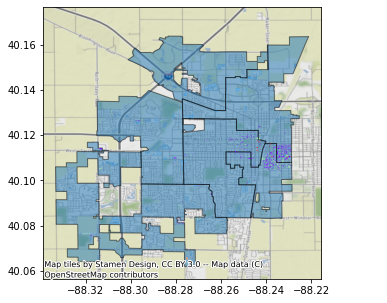

In [63]:
fig, ax = plt.subplots(figsize=(5,5))

gdf_councils.plot(ax=ax, alpha=0.5, edgecolor='black')
#gdf_apts.plot(ax=ax, color='lightgreen')
gdf_apts.plot(column='Building_Type', ax=ax, cmap='rainbow') # NOT the best colormap

ctx.add_basemap(ax=ax, crs=gdf_councils.crs.to_string())

plt.show()

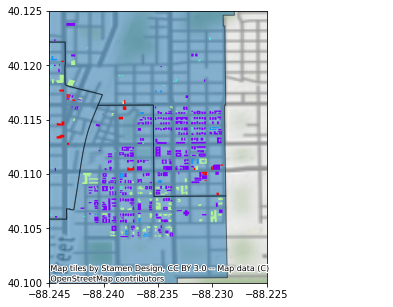

In [64]:
fig, ax = plt.subplots(figsize=(5,5))

gdf_councils.plot(ax=ax, alpha=0.5, edgecolor='black')
#gdf_apts.plot(ax=ax, color='lightgreen')
gdf_apts.plot(column='Building_Type', ax=ax, cmap='rainbow') # NOT the best colormap

ctx.add_basemap(ax=ax, crs=gdf_councils.crs.to_string())

# zoom in
ax.set_xlim(-88.245, -88.225)
ax.set_ylim(40.10, 40.125)

plt.show()

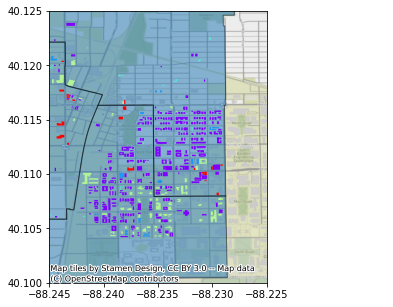

In [65]:
fig, ax = plt.subplots(figsize=(5,5))

# zoom in
ax.set_xlim(-88.245, -88.225)
ax.set_ylim(40.10, 40.125)

gdf_councils.plot(ax=ax, alpha=0.5, edgecolor='black')
#gdf_apts.plot(ax=ax, color='lightgreen')
gdf_apts.plot(column='Building_Type', ax=ax, cmap='rainbow') # NOT the best colormap

ctx.add_basemap(ax=ax, crs=gdf_councils.crs.to_string())


plt.show()

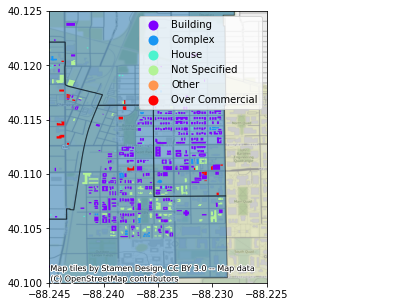

In [69]:
fig, ax = plt.subplots(figsize=(8,5)) # making a figure

# zoom in
ax.set_xlim(-88.245, -88.225) # x limits
ax.set_ylim(40.10, 40.125) # y limits

gdf_councils.plot(ax=ax, alpha=0.5, edgecolor='black') # shapefile/geojson file associated with city councils
gdf_apts.plot(column='Building_Type', ax=ax, cmap='rainbow', 
              legend=True, categorical=True) # plotting different city apartments/buildings

#ctx.add_basemap(ax=ax, crs=gdf_councils.crs.to_string()) # grabbing data from OpenStreetMaps
ctx.add_basemap(ax=ax, crs=gdf_councils.crs) # if .to_string doesn't work, try this


plt.show()

## Make our plots interactive with ipywidgets

In [70]:
import ipywidgets

Step 1: hardcode our parameter of choice

In [72]:
btype = 'Complex'

# mask out and grab a subset of my data -- subset dataframe
gdf_apts.loc[gdf_apts['Building_Type']==btype].head()

,OBJECTID,Address,Parcel,Units,Stories,UniqueID,Building_Name,Complex_Name,Case_Number,Building_Type,...,Comments,Safety_Comments,Fire_Alarms,Sprinkler,Managing_Company,MFRecyclingStatus,ShapeSTArea,ShapeSTLength,Shape,geometry
0,1,2009 Moreland Blvd,412001126038,36,3,0.0,2009 Moreland Blvd,University Village at Champaign,AI07-0147,Complex,...,,,Yes,Yes,None,Yes,19657.997437,929.167804,None,"POLYGON ((-88.25315 40.14017, -88.25315 40.140..."
1,2,2011 Moreland Blvd,412001126038,36,3,1.0,2011 Moreland Blvd,University Village at Champaign,AI07-0147,Complex,...,,,Yes,Yes,None,Yes,19735.512329,950.194217,None,"POLYGON ((-88.25260 40.14057, -88.25256 40.140..."
2,3,2007 Moreland Blvd,412001126038,24,3,2.0,2007 Moreland Blvd,University Village at Champaign,AI07-0147,Complex,...,,,Yes,Yes,None,Yes,13970.178833,678.398035,None,"POLYGON ((-88.25274 40.14045, -88.25274 40.140..."
3,4,2003 Moreland Blvd,412001126038,36,3,3.0,2003 Moreland Blvd,University Village at Champaign,AI07-0147,Complex,...,,,Yes,Yes,None,Yes,19739.423340,941.358477,None,"POLYGON ((-88.25154 40.13978, -88.25156 40.139..."
4,5,2005 Moreland Blvd,412001126038,24,3,4.0,2005 Moreland Blvd,University Village at Champaign,AI07-0147,Complex,...,,,Yes,Yes,None,Yes,13065.121582,636.744457,None,"POLYGON ((-88.25351 40.13934, -88.25348 40.139..."


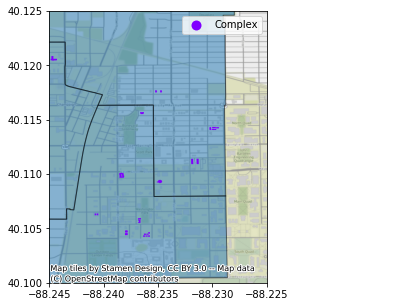

In [73]:
# add hardcoded stuff to top
btype = 'Complex'

# mask out and grab a subset of my data -- subset dataframe
gdf_apts_subset = gdf_apts.loc[gdf_apts['Building_Type']==btype]

fig, ax = plt.subplots(figsize=(8,5)) # making a figure

# zoom in
ax.set_xlim(-88.245, -88.225) # x limits
ax.set_ylim(40.10, 40.125) # y limits

gdf_councils.plot(ax=ax, alpha=0.5, edgecolor='black') # shapefile/geojson file associated with city councils
gdf_apts_subset.plot(column='Building_Type', ax=ax, cmap='rainbow', 
              legend=True, categorical=True) # plotting different city apartments/buildings

#ctx.add_basemap(ax=ax, crs=gdf_councils.crs.to_string()) # grabbing data from OpenStreetMaps
ctx.add_basemap(ax=ax, crs=gdf_councils.crs) # if .to_string doesn't work, try this


plt.show()

Step 2: "functionize" our hard-coded option

In [74]:
# add hardcoded stuff to top
#btype = 'Complex'

def my_champaign_plot(btype):
    # mask out and grab a subset of my data -- subset dataframe
    gdf_apts_subset = gdf_apts.loc[gdf_apts['Building_Type']==btype]

    fig, ax = plt.subplots(figsize=(8,5)) # making a figure

    # zoom in
    ax.set_xlim(-88.245, -88.225) # x limits
    ax.set_ylim(40.10, 40.125) # y limits

    gdf_councils.plot(ax=ax, alpha=0.5, edgecolor='black') # shapefile/geojson file associated with city councils
    gdf_apts_subset.plot(column='Building_Type', ax=ax, cmap='rainbow', 
                  legend=True, categorical=True) # plotting different city apartments/buildings

    #ctx.add_basemap(ax=ax, crs=gdf_councils.crs.to_string()) # grabbing data from OpenStreetMaps
    ctx.add_basemap(ax=ax, crs=gdf_councils.crs) # if .to_string doesn't work, try this


    plt.show()

3. Try out our function a few times

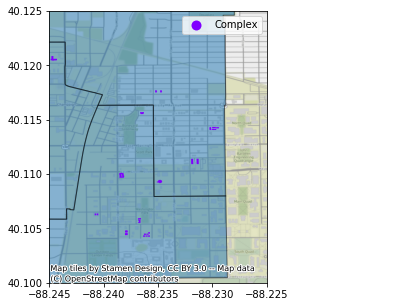

In [75]:
my_champaign_plot('Complex')

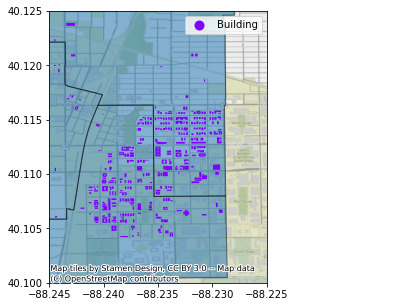

In [76]:
my_champaign_plot('Building')

Step 4: Put the decorator function on top

In [77]:
@ipywidgets.interact(btype=gdf_apts['Building_Type'].unique())
def my_champaign_plot(btype):
    # mask out and grab a subset of my data -- subset dataframe
    gdf_apts_subset = gdf_apts.loc[gdf_apts['Building_Type']==btype]

    fig, ax = plt.subplots(figsize=(8,5)) # making a figure

    # zoom in
    ax.set_xlim(-88.245, -88.225) # x limits
    ax.set_ylim(40.10, 40.125) # y limits

    gdf_councils.plot(ax=ax, alpha=0.5, edgecolor='black') # shapefile/geojson file associated with city councils
    gdf_apts_subset.plot(column='Building_Type', ax=ax, cmap='rainbow', 
                  legend=True, categorical=True) # plotting different city apartments/buildings

    #ctx.add_basemap(ax=ax, crs=gdf_councils.crs.to_string()) # grabbing data from OpenStreetMaps
    ctx.add_basemap(ax=ax, crs=gdf_councils.crs) # if .to_string doesn't work, try this


    plt.show()

interactive(children=(Dropdown(description='btype', options=('Complex', 'Building', 'House', 'Over Commercial'…

In [82]:
gdf_apts['Building_Type'].unique()

array(['Complex', 'Building', 'House', 'Over Commercial', 'Not Specified',
       'Other'], dtype=object)

In [84]:
colors = {'Complex':'black', 'Building':'green', 
          'House':'red', 'Over Commercial':'magenta', 'Not Specified':'yellow', 'Other':'blue'}

In [91]:
@ipywidgets.interact(btype=gdf_apts['Building_Type'].unique())
def my_champaign_plot(btype):
    # mask out and grab a subset of my data -- subset dataframe
    gdf_apts_subset = gdf_apts.loc[gdf_apts['Building_Type']==btype]

    fig, ax = plt.subplots(figsize=(8,5)) # making a figure

    # zoom in
    ax.set_xlim(-88.245, -88.225) # x limits
    ax.set_ylim(40.10, 40.125) # y limits
    

    gdf_councils.plot(ax=ax, alpha=0.5, edgecolor='black') # shapefile/geojson file associated with city councils
    gdf_apts_subset.plot(column='Building_Type', ax=ax, 
                         color=colors[btype]) # plotting different city apartments/buildings

    #ctx.add_basemap(ax=ax, crs=gdf_councils.crs.to_string()) # grabbing data from OpenStreetMaps
    ctx.add_basemap(ax=ax, crs=gdf_councils.crs) # if .to_string doesn't work, try this

    plt.show()

interactive(children=(Dropdown(description='btype', options=('Complex', 'Building', 'House', 'Over Commercial'…

In [87]:
ax.legend?